In [ ]:
# import librareries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df               

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
#no null value found

In [5]:
df.shape

(32560, 15)

In [6]:
df.size

488400

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [9]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [10]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [12]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [13]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# lets check data visualization with different graph

<AxesSubplot:>

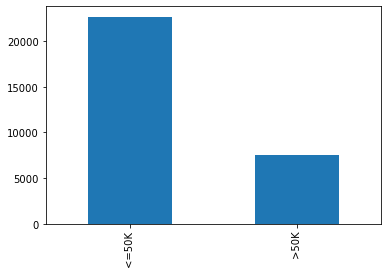

In [15]:
df['Income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

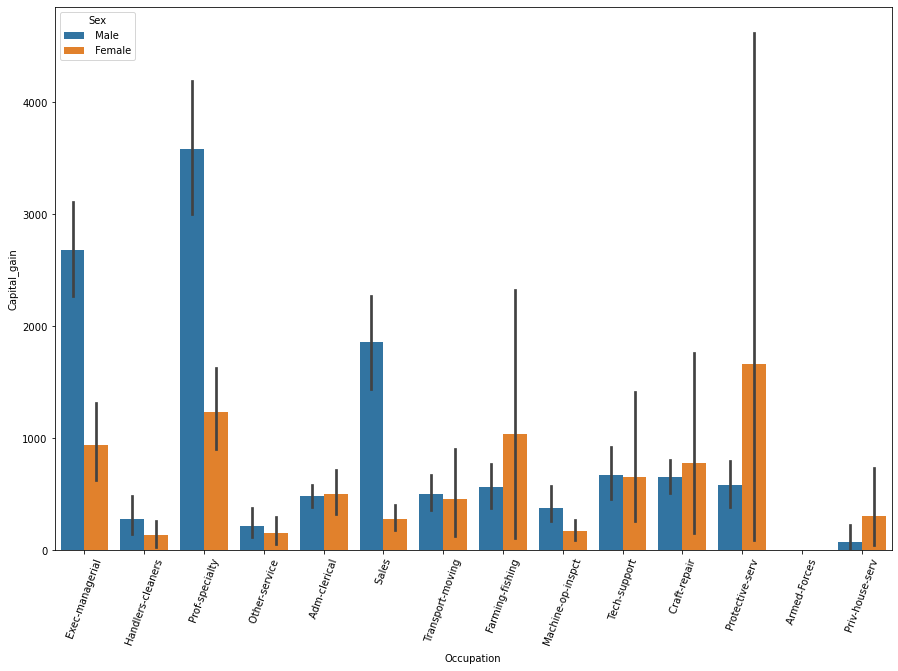

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Sex')
plt.xticks(rotation=70)

In [ ]:
#convert data into numeric encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder() 
df['Income']=le.fit_transform(df['Income'])
df['Sex']=le.fit_transform(df['Sex'])

df = pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)

In [21]:
df

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,1,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#to scaled data 

In [41]:
scaler = StandardScaler()
train_col_sacler= df[['Age','Fnlwgt','Education_num','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacler.columns)
df['Age']= train_scaler_col['Age']
df['Fnlwgt']= train_scaler_col['Fnlwgt']
df['Education_num']= train_scaler_col['Education_num']
df['Hours_per_week']= train_scaler_col['Hours_per_week']
df

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.878329,-1.008513,1.126727,1,0,0,-2.332134,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.034105,0.245421,-0.437946,1,0,0,-0.076261,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.106437,0.426165,-1.220283,1,0,0,-0.076261,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.794467,1.408655,1.126727,0,0,0,-0.076261,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.110142,0.898620,1.517896,0,0,0,-0.076261,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,NaN,NaN,NaN,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,NaN,NaN,NaN,1,0,0,NaN,1,0,1,0

In [43]:
df.Age.unique()

array([ 0.87832882, -0.03410545,  1.10643738, -0.79446733, -0.11014164,
        0.80229263,  1.03040119, -0.56635877,  0.27003931, -0.64239495,
       -1.17464827, -0.49032258,  0.3460755 ,  0.11796693,  1.18247357,
       -0.26221401,  1.56265451,  1.33454595, -1.47879303,  0.04193074,
        0.49814787, -1.25068446,  0.72625644, -1.32672065, -1.09861209,
        1.41058213,  0.42211168,  0.19400312, -0.71843114, -1.0225759 ,
        0.65022025,  0.57418406, -0.18617782,  3.08337828, -1.55482922,
       -0.41428639, -0.3382502 ,  2.85526972, -1.40275684,  1.25850976,
       -0.87050352,  1.71472689,  2.39905258,  2.47508877,  2.09490783,
        0.954365  ,  1.48661832, -0.94653971, -1.63086541,  1.6386907 ,
        3.91977635,  2.77923353,  2.01887164,  1.94283545,  2.9313059 ,
        1.79076308,  1.86679927,  2.17094402,  2.55112496,  2.24698021,
        2.62716115,  3.23545066,  3.00734209,  3.76770398,  2.3230164 ,
        2.70319734,  3.15941447,  3.46355922,  3.38752304,  3.53

In [ ]:
# nan value handle

In [44]:
df['Age']=df['Age'].fillna(df['Age']).mean()

In [45]:
df['Education_num']=df['Education_num'].fillna(df['Education_num']).mean()

In [46]:
df['Hours_per_week']=df['Hours_per_week'].fillna(df['Hours_per_week']).mean()

In [48]:
df['Fnlwgt']=df['Fnlwgt'].fillna(df['Fnlwgt']).mean()

In [49]:
df

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,-0.000172,0.002331,-0.001777,1,0,0,-0.001326,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.000172,0.002331,-0.001777,1,0,0,-0.001326,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.000172,0.002331,-0.001777,1,0,0,-0.001326,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.000172,0.002331,-0.001777,0,0,0,-0.001326,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.000172,0.002331,-0.001777,0,0,0,-0.001326,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.000172,0.002331,-0.001777,0,0,0,-0.001326,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,-0

In [ ]:
#seperate label and feature

In [50]:
X = df.drop(['Income'],axis=1)
y = df['Income']

In [ ]:
#train the model

In [51]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=48)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#using different model creating model

In [53]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dt=DecisionTreeClassifier() 
rf=RandomForestClassifier() 
adb=AdaBoostClassifier()    
svm=SVC()                
gdboost=GradientBoostingClassifier()   
print("Model is created")

Model is created


In [54]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [55]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))


Lr classification score 0.8440697233800682
knn classification score 0.8680845017051914
dt classification score 0.89759378552482
rf classification score 0.89759378552482
adb classification score 0.8545850701023114
svm classification score 0.7979348237968927
gdboost classification score 0.8600322091701402


In [56]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)


In [ ]:
# using confusuin matrix see the model accuracy

In [57]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6217  510]
 [ 971 1351]]


In [58]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[6201  526]
 [ 907 1415]]


In [59]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[6211  516]
 [ 931 1391]]


In [60]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[6252  475]
 [ 936 1386]]


In [61]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[6279  448]
 [ 941 1381]]


In [62]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[6533  194]
 [1693  629]]


In [63]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[6375  352]
 [ 999 1323]]


In [ ]:
#check classification report for all model

In [64]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6727
           1       0.73      0.58      0.65      2322

    accuracy                           0.84      9049
   macro avg       0.80      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049

 knn classification_report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6727
           1       0.73      0.61      0.66      2322

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049

 dt classification_report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6727
           1       0.73      0.60      0.66      2322

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78

In [68]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))


0.7530060638559537
0.7655980495379863
0.7611733642576031
0.7631441270455862
0.7640743071072428
0.6210240796246168
0.7587204980968745


In [ ]:
# use Aouc roc curve to find best fit line

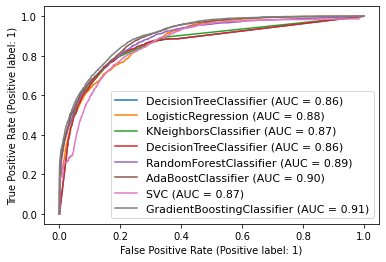

In [69]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')